In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Liberation Serif'

import logging
import pickle
from datetime import datetime
import os
from data_processing import gen_ckpt_steps
from conv_plots_funcs import get_seg_starts_per_config
import torch
import gc
from core.config import Config
from data_train import set_config_params, gen_ckpt_pred_steps

/home/sultand/quick_and_dirty_moss/src
Using device: cuda
/home/sultand/quick_and_dirty_moss/src
Using device: cuda
CUDA_VISIBLE_DEVICES: None


In [15]:
config = Config()
model_name = "ortho_haar_big"

output_dir, ckpt_dir, experiment_name = set_config_params(config, model_name)

datasource = "val"


colors = ['#000000', '#005CAB', '#E31B23', '#FFC325', '#00A651', '#9B59B6']



ORTHO HAAR BIG MODEL




In [37]:
ckpt_steps = gen_ckpt_pred_steps(model_name)

datasources = ["val", "train"]
tf_avg_cong = []
tf_std_cong = []
zero_quartiles_cong = []
train_exs_cong = []
for datasource in datasources:
    train_exs = []
    tf_avg_lst = []
    tf_std_lst = []

    for ckpt in np.arange(1000, 122000+1000, 1000):

        train_ex = ckpt*len(config.devices)*config.batch_size

        path = f"{output_dir}/prediction_errors{config.C_dist}_step={ckpt}.ckpt/train_conv_mult_cut_{datasource}_ortho_haar_state_dim_5_err_lss_examples.pkl"

        try:
            with open(path, "rb") as f:
                data = pickle.load(f)
                tf_errs = data["MOP"][0]
                zero_errs = data["Zero"][0]

                print(f"tf_errs.shape: {tf_errs.shape}")
                print(f"zero_errs.shape: {zero_errs.shape}")

                #set all np.inf to 0 in tf_errs and zero_errs
                tf_errs[np.isinf(tf_errs)] = 0
                zero_errs[np.isinf(zero_errs)] = 0


        except FileNotFoundError:
            print(f"ckpt {ckpt} not found at {path}")
            continue

        print(f"\n\n\nckpt: {ckpt}")
        print(f"train_ex: {train_ex}")
        tf_errs_mean_trial = np.mean(tf_errs, axis=1)
        print(f"tf_errs_mean_trial.shape: {tf_errs_mean_trial.shape}")

        tf_errs_mean = np.mean(tf_errs_mean_trial, axis=0)
        print(f"tf_errs_mean.shape: {tf_errs_mean.shape}")

        tf_avg = np.mean(tf_errs_mean, axis=0)
        tf_std = np.std(tf_errs_mean, axis=0) / np.sqrt(tf_errs_mean.shape[0])

        tf_avg_lst.append(tf_avg)
        tf_std_lst.append(tf_std)
        train_exs.append(train_ex)

    tf_avg_cong.append(tf_avg_lst)
    tf_std_cong.append(tf_std_lst)
    train_exs_cong.append(train_exs)


len(full_range) 134
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 11000, 14000, 17000, 20000, 23000, 26000, 29000, 32000, 35000, 38000, 41000, 44000, 47000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000]
39
tf_errs.shape: (5000, 1, 251)
zero_errs.shape: (5000, 1, 251)



ckpt: 1000
train_ex: 640000
tf_errs_mean_trial.shape: (5000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (5000, 1, 251)
zero_errs.shape: (5000, 1, 251)



ckpt: 2000
train_ex: 1280000
tf_errs_mean_trial.shape: (5000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (5000, 1, 251)
zero_errs.shape: (5000, 1, 251)



ckpt: 3000
train_ex: 1920000
tf_errs_mean_trial.shape: (5000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (5000, 1, 251)
zero_errs.shape: (5000, 1, 251)



ckpt: 4000
train_ex: 2560000
tf_errs_mean_trial.shape: (5000, 251)
tf_errs_mean.shape: (251,)
tf_errs.shape: (5000, 1, 251)
zero_errs.shape: (5000, 1, 251)



ckp

In [6]:
def gen_cong_lsts(config, model_name):

    output_dir, ckpt_dir, experiment_name = set_config_params(config, model_name)
    ckpt_steps = gen_ckpt_pred_steps(model_name)

    datasources = ["val", "train"]
    tf_avg_cong = []
    tf_std_cong = []
    train_exs_cong = []
    for datasource in datasources:
        train_exs = []
        tf_avg_lst = []
        tf_std_lst = []

        for ckpt in np.arange(1000, ckpt_steps[-1] + 1000, 1000):

            train_ex = ckpt*len(config.devices)*config.batch_size

            path = f"{output_dir}/prediction_errors{config.C_dist}_step={ckpt}.ckpt/train_conv_mult_cut_{datasource}_ortho_haar_state_dim_5_err_lss_examples.pkl"

            try:
                with open(path, "rb") as f:
                    data = pickle.load(f)
                    tf_errs = data["MOP"][0]

                    print(f"tf_errs.shape: {tf_errs.shape}")

                    #set all np.inf to 0 in tf_errs and zero_errs
                    tf_errs[np.isinf(tf_errs)] = 0


            except FileNotFoundError:
                print(f"ckpt {ckpt} not found")
                continue

            print(f"\n\n\nckpt: {ckpt}")
            tf_errs_mean_trial = np.mean(tf_errs, axis=1)
            print(f"tf_errs_mean_trial.shape: {tf_errs_mean_trial.shape}")

            tf_errs_mean = np.mean(tf_errs_mean_trial, axis=0)
            print(f"tf_errs_mean.shape: {tf_errs_mean.shape}")

            tf_avg = np.mean(tf_errs_mean, axis=0)
            tf_std = np.std(tf_errs_mean, axis=0) / np.sqrt(tf_errs_mean.shape[0])

            tf_avg_lst.append(tf_avg)
            tf_std_lst.append(tf_std)
            train_exs.append(train_ex)

        tf_avg_cong.append(tf_avg_lst)
        tf_std_cong.append(tf_std_lst)
        train_exs_cong.append(train_exs)

    return tf_avg_cong, tf_std_cong, train_exs_cong, output_dir
    

len(tf_avg_cong): 2
tf_avg_lst: [np.float32(0.8218978), np.float32(0.38129985), np.float32(0.26019827), np.float32(0.16450317), np.float32(0.13108689), np.float32(0.116668604), np.float32(0.110702746), np.float32(0.10015403), np.float32(0.086312175), np.float32(0.07711188), np.float32(0.07241653), np.float32(0.06913518), np.float32(0.066696234), np.float32(0.065679766), np.float32(0.06197438), np.float32(0.059723597), np.float32(0.05944716), np.float32(0.06083676), np.float32(0.060546745), np.float32(0.061312754), np.float32(0.062521026), np.float32(0.06305371), np.float32(0.06472043), np.float32(0.06589993), np.float32(0.0671752), np.float32(0.06881553), np.float32(0.067926064), np.float32(0.068785466), np.float32(0.07004189), np.float32(0.071110226), np.float32(0.072475806), np.float32(0.07391678), np.float32(0.07473517), np.float32(0.07467697), np.float32(0.075750224), np.float32(0.07634215)]
tf_avg_lst: []


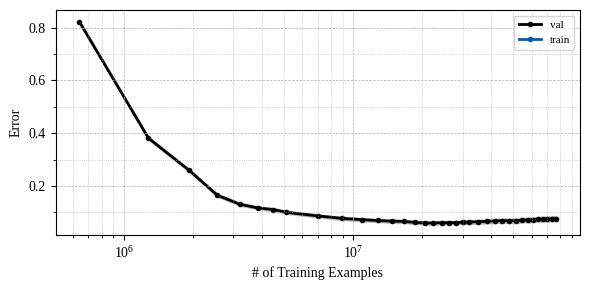

In [31]:
fig,ax = plt.subplots(1, 1, figsize=(6, 3))
count = 0

print(f"len(tf_avg_cong): {len(tf_avg_cong)}")
for tf_avg_lst, tf_std_lst, train_exs in zip(tf_avg_cong, tf_std_cong, train_exs_cong):
    tf_avg_arr = np.array(tf_avg_lst)
    tf_std_arr = np.array(tf_std_lst)
    train_exs_arr = np.array(train_exs)
    print(f"tf_avg_lst: {tf_avg_lst}")
    ax.plot(train_exs_arr, tf_avg_arr, color=colors[count], linewidth=2, label=datasources[count], marker="o", markersize=3, zorder=1-count)
    ax.fill_between(train_exs_arr, tf_avg_arr - tf_std_arr, tf_avg_arr + tf_std_arr, color=colors[count], alpha=0.2, zorder=0)
    count += 1


ax.set_ylabel("Error")
ax.set_xlabel("# of Training Examples")
# ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="upper right", fontsize=8)
#set minor yticks every 0.01
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#set gridlines
ax.grid(which='major', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)


fig.tight_layout()
time = datetime.now().strftime("%Y-%m-%d_%H")
fig_path = f"{output_dir}/figures/multi_cut/pretrain_loss/{model_name}_train_val_loss_cong_{time}.pdf"

os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path, format='pdf')

In [ ]:
#import zipf distribution from scipy
from scipy.stats import zipfian

In [ ]:
#expectation of zipfian (k,n)
a = 1.5
n = 25

m = zipfian.mean(a, n)
print("Mean of Zipfian(1.5,25) = ", m)

avg_k = m

f6_err = (1 + 1 + 0.8 + 0.6 + 0.4 + 0.2)
print(f"f6_err: {f6_err}")

est_low_bound = avg_k*f6_err/(251)
print(f"est_low_bound: {est_low_bound}")

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(6, 3))
count = 0

print(f"len(tf_avg_cong): {len(tf_avg_cong)}")
for tf_avg_lst, tf_std_lst, train_exs in zip(tf_avg_cong, tf_std_cong, train_exs_cong):
    tf_avg_arr = np.array(tf_avg_lst) - est_low_bound
    tf_std_arr = np.array(tf_std_lst) - est_low_bound
    train_exs_arr = np.array(train_exs)
    print(f"tf_avg_lst: {tf_avg_lst}")
    ax.plot(train_exs_arr, tf_avg_arr, color=colors[count], linewidth=2, label=datasources[count], marker="o", markersize=3, zorder=1-count)
    ax.fill_between(train_exs_arr, tf_avg_arr - tf_std_arr, tf_avg_arr + tf_std_arr, color=colors[count], alpha=0.2, zorder=0)
    count += 1


ax.set_ylabel("Error")
ax.set_xlabel("# of Training Examples")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="upper right", fontsize=8)
#set minor yticks every 0.01
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#set gridlines
ax.grid(which='major', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)


fig.tight_layout()
time = datetime.now().strftime("%Y-%m-%d_%H")
fig_path = f"{output_dir}/figures/multi_cut/pretrain_loss/{model_name}_train_val_loss_cong_log_{time}.pdf"

os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path, format='pdf')

## Pseudoinv baseline for init segs

In [ ]:
#load data from /data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/val_interleaved_traces_ortho_haar_ident_C_multi_cut.pkl

with open("/data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/val_interleaved_traces_ortho_haar_ident_C_multi_cut.pkl", "rb") as f:
    data = pickle.load(f)
    print(f"data.keys(): {data.keys()}")
    multi_sys_ys = data["multi_sys_ys"][0]
    multi_sys_ys = np.take(multi_sys_ys, np.arange(multi_sys_ys.shape[-1] - config.ny, multi_sys_ys.shape[-1]), axis=-1) #get the true test observations
    
    sys_choices_per_config = data["sys_choices_per_config"][0]
    seg_starts_per_config = data["seg_starts_per_config"][0]
    sys_inds_per_config = data["sys_inds_per_config"][0]
    real_seg_lens_per_config = data["real_seg_lens_per_config"][0]
    sys_dict_per_config = data["sys_dict_per_config"][0]

    print(f"multi_sys_ys.shape: {multi_sys_ys.shape}")
    print(f"len(sys_choices_per_config): {len(sys_choices_per_config)}")
    print(f"len(seg_starts_per_config): {len(seg_starts_per_config)}")
    print(f"len(sys_inds_per_config): {len(sys_inds_per_config)}")
    print(f"len(real_seg_lens_per_config): {len(real_seg_lens_per_config)}")

In [5]:
def get_multi_sys_ys(datasource):
    with open(f"/data/shared/ICL_Kalman_Experiments/train_and_test_data/ortho_haar/{datasource}_interleaved_traces_ortho_haar_ident_C_multi_cut.pkl", "rb") as f:
        data = pickle.load(f)
        print(f"data.keys(): {data.keys()}")
        multi_sys_ys = data["multi_sys_ys"][0]
        multi_sys_ys = np.take(multi_sys_ys, np.arange(multi_sys_ys.shape[-1] - config.ny, multi_sys_ys.shape[-1]), axis=-1) #get the true test observations
        
        sys_choices_per_config = data["sys_choices_per_config"][0]
        seg_starts_per_config = data["seg_starts_per_config"][0]
        sys_inds_per_config = data["sys_inds_per_config"][0]
        real_seg_lens_per_config = data["real_seg_lens_per_config"][0]
        sys_dict_per_config = data["sys_dict_per_config"][0]

        print(f"multi_sys_ys.shape: {multi_sys_ys.shape}")
        print(f"len(sys_choices_per_config): {len(sys_choices_per_config)}")
        print(f"len(seg_starts_per_config): {len(seg_starts_per_config)}")
        print(f"len(sys_inds_per_config): {len(sys_inds_per_config)}")
        print(f"len(real_seg_lens_per_config): {len(real_seg_lens_per_config)}")
    
    return multi_sys_ys, sys_choices_per_config, seg_starts_per_config, sys_inds_per_config, real_seg_lens_per_config, sys_dict_per_config

In [4]:
multi_sys_ys, sys_choices_per_config, seg_starts_per_config, sys_inds_per_config, real_seg_lens_per_config, sys_dict_per_config = get_multi_sys_ys("val")

NameError: name 'get_multi_sys_ys' is not defined

In [ ]:
print(f"sys_choices_per_config[0][0]: {sys_choices_per_config[0][0]}")
print(f"sys_inds_per_config[0][0]: {sys_inds_per_config[0][0]}")
print(f"sys_dict_per_config[0]: {sys_dict_per_config[0]}")

In [ ]:
from linalg_helpers import print_matrix

In [7]:
def pseudo_prediction(history):

    # print_matrix(history, "history")
    inds = history.shape[1]
    # print(f"inds: {inds}")

    leftmat = history[:, 1:inds]
    # print(f"leftmat.shape: {leftmat.shape}")
    # print_matrix(leftmat, "leftmat")
    rightmat = history[:, 0:inds-1]
    # print(f"rightmat.shape: {rightmat.shape}")
    # print_matrix(rightmat, "rightmat")

    Uhat = leftmat @ np.linalg.pinv(rightmat)
    # print(f"Uhat.shape: {Uhat.shape}")

    pred = Uhat @ history[:,-1]
    # print(f"pred.shape: {pred.shape}")
    return pred

In [9]:
def compute_pseudo_pred_errs(multi_sys_ys, seg_starts_per_config, real_seg_lens_per_config, sys_choices_per_config):
    pseudo_pred_errs = np.zeros_like(multi_sys_ys[:,:,:,0])
    print(f"pseudo_pred_errs.shape: {pseudo_pred_errs.shape}")

    for conf in range(multi_sys_ys.shape[0]):

        # print(f"sys_choices_per_config[conf]: {sys_choices_per_config[conf]}")

        errs_conf = np.zeros_like(multi_sys_ys[conf,:,:,0])
        # print(f"errs_conf.shape: {errs_conf.shape}")

        sys_init_ind_dict = {} # a dictionary that holds the system indices and how many initial indices have been seen for the config

        sys_appear = [] #holds the system indices that appear in the config

        seg_count = 0
        for seg in seg_starts_per_config[conf]:
            
            current_sys = sys_choices_per_config[conf][seg_count]
            # print(f"\n\ncurrent_sys: {current_sys}")
            if current_sys not in sys_appear: # if the system has not appeared before
                start_ind = seg + 1
                # print(f"start_ind: {start_ind}")
                real_seg_len = real_seg_lens_per_config[conf][seg_count]
                # print(f"real_seg_len: {real_seg_len}")
                end_ind = start_ind + real_seg_len
                # print(f"end_ind: {end_ind}")
                segment = multi_sys_ys[conf][:, start_ind:end_ind, :]
                # print(f"segment.shape: {segment.shape}")
                # print(f"segment: {segment}\n")
                sys_init_ind_dict[current_sys] = segment # add the system to the dictionary with the segment
                sys_appear.append(current_sys) #append the system to the list of systems that have appeared

                for ys_ind in range(start_ind+1, end_ind): #generate the pseudo prediction for each ys_ind in the segment and compute the squared error
                    hist = multi_sys_ys[conf][0, start_ind:ys_ind, :].T

                    pred = pseudo_prediction(hist)
                    # print(f"pred: {pred}")
                    # print(f'pred.shape: {pred.shape}')
                    # print(f"multi_sys_ys[conf][0, ys_ind, :]: {multi_sys_ys[conf][0, ys_ind, :]}")
                    true = multi_sys_ys[conf][0, ys_ind, :]
                    
                    errs_conf[0, ys_ind] = np.linalg.norm(pred - true)**2

                    # print(f"errs_conf[0, {ys_ind}, :]: {errs_conf[0, ys_ind, :]}")
                    # print(f"ys_ind: {ys_ind}")
                    # print(f"hist.shape: {hist.shape}")

            elif sys_init_ind_dict[current_sys].shape[1] < 6: # still need to see 6 examples of the system
                
                old_seg_len = sys_init_ind_dict[current_sys].shape[1]
                # print(f"old segment.shape: {sys_init_ind_dict[current_sys].shape}")
                start_ind = seg + 1
                # print(f"start_ind: {start_ind}")
                real_seg_len = real_seg_lens_per_config[conf][seg_count]
                # print(f"real_seg_len: {real_seg_len}")
                end_ind = start_ind + real_seg_len
                # print(f"end_ind: {end_ind}")
                segment = multi_sys_ys[conf][:, start_ind:end_ind, :]
                # print(f"new segment.shape: {segment.shape}")

                segment = np.concatenate((sys_init_ind_dict[current_sys], segment), axis=1) # concatenate the new segment with the old segment

                # print(f"segment.shape: {segment.shape}")
                # print(f"segment: {segment}\n")
                sys_init_ind_dict[current_sys] = segment # add the system to the dictionary with the segment
                sys_appear.append(current_sys) #append the system to the list of systems that have appeared

                hist_count = 1
                for ys_ind in range(start_ind+1, end_ind): #generate the pseudo prediction for each ys_ind in the segment and compute the squared error
                    hist = segment[0, 0:old_seg_len + hist_count, :].T

                    pred = pseudo_prediction(hist)
                    # print(f"pred: {pred}")
                    # print(f'pred.shape: {pred.shape}')
                    # print(f"multi_sys_ys[conf][0, ys_ind, :]: {multi_sys_ys[conf][0, ys_ind, :]}")
                    true = multi_sys_ys[conf][0, ys_ind, :]
                    
                    errs_conf[0, ys_ind] = np.linalg.norm(pred - true)**2

                    # print(f"errs_conf[0, {ys_ind}, :]: {errs_conf[0, ys_ind]}")
                    # print(f"ys_ind: {ys_ind}")
                    hist_count += 1

            else: # have already seen 6 examples of the system
                pass

            seg_count += 1
        
        pseudo_pred_errs[conf] = errs_conf

    return pseudo_pred_errs

In [ ]:
pseudo_pred_errs = np.zeros_like(multi_sys_ys[:,:,:,0])
print(f"pseudo_pred_errs.shape: {pseudo_pred_errs.shape}")

for conf in range(multi_sys_ys.shape[0]):

    # print(f"sys_choices_per_config[conf]: {sys_choices_per_config[conf]}")

    errs_conf = np.zeros_like(multi_sys_ys[conf,:,:,0])
    # print(f"errs_conf.shape: {errs_conf.shape}")

    sys_init_ind_dict = {} # a dictionary that holds the system indices and how many initial indices have been seen for the config

    sys_appear = [] #holds the system indices that appear in the config

    seg_count = 0
    for seg in seg_starts_per_config[conf]:
        
        current_sys = sys_choices_per_config[conf][seg_count]
        # print(f"\n\ncurrent_sys: {current_sys}")
        if current_sys not in sys_appear: # if the system has not appeared before
            start_ind = seg + 1
            # print(f"start_ind: {start_ind}")
            real_seg_len = real_seg_lens_per_config[conf][seg_count]
            # print(f"real_seg_len: {real_seg_len}")
            end_ind = start_ind + real_seg_len
            # print(f"end_ind: {end_ind}")
            segment = multi_sys_ys[conf][:, start_ind:end_ind, :]
            # print(f"segment.shape: {segment.shape}")
            # print(f"segment: {segment}\n")
            sys_init_ind_dict[current_sys] = segment # add the system to the dictionary with the segment
            sys_appear.append(current_sys) #append the system to the list of systems that have appeared

            for ys_ind in range(start_ind+1, end_ind): #generate the pseudo prediction for each ys_ind in the segment and compute the squared error
                hist = multi_sys_ys[conf][0, start_ind:ys_ind, :].T

                pred = pseudo_prediction(hist)
                # print(f"pred: {pred}")
                # print(f'pred.shape: {pred.shape}')
                # print(f"multi_sys_ys[conf][0, ys_ind, :]: {multi_sys_ys[conf][0, ys_ind, :]}")
                true = multi_sys_ys[conf][0, ys_ind, :]
                
                errs_conf[0, ys_ind] = np.linalg.norm(pred - true)**2

                # print(f"errs_conf[0, {ys_ind}, :]: {errs_conf[0, ys_ind, :]}")
                # print(f"ys_ind: {ys_ind}")
                # print(f"hist.shape: {hist.shape}")

        elif sys_init_ind_dict[current_sys].shape[1] < 6: # still need to see 6 examples of the system
            
            old_seg_len = sys_init_ind_dict[current_sys].shape[1]
            # print(f"old segment.shape: {sys_init_ind_dict[current_sys].shape}")
            start_ind = seg + 1
            # print(f"start_ind: {start_ind}")
            real_seg_len = real_seg_lens_per_config[conf][seg_count]
            # print(f"real_seg_len: {real_seg_len}")
            end_ind = start_ind + real_seg_len
            # print(f"end_ind: {end_ind}")
            segment = multi_sys_ys[conf][:, start_ind:end_ind, :]
            # print(f"new segment.shape: {segment.shape}")

            segment = np.concatenate((sys_init_ind_dict[current_sys], segment), axis=1) # concatenate the new segment with the old segment

            # print(f"segment.shape: {segment.shape}")
            # print(f"segment: {segment}\n")
            sys_init_ind_dict[current_sys] = segment # add the system to the dictionary with the segment
            sys_appear.append(current_sys) #append the system to the list of systems that have appeared

            hist_count = 1
            for ys_ind in range(start_ind+1, end_ind): #generate the pseudo prediction for each ys_ind in the segment and compute the squared error
                hist = segment[0, 0:old_seg_len + hist_count, :].T

                pred = pseudo_prediction(hist)
                # print(f"pred: {pred}")
                # print(f'pred.shape: {pred.shape}')
                # print(f"multi_sys_ys[conf][0, ys_ind, :]: {multi_sys_ys[conf][0, ys_ind, :]}")
                true = multi_sys_ys[conf][0, ys_ind, :]
                
                errs_conf[0, ys_ind] = np.linalg.norm(pred - true)**2

                # print(f"errs_conf[0, {ys_ind}, :]: {errs_conf[0, ys_ind]}")
                # print(f"ys_ind: {ys_ind}")
                hist_count += 1

        else: # have already seen 6 examples of the system
            pass

        seg_count += 1
    
    pseudo_pred_errs[conf] = errs_conf

In [13]:
pseudo_pred_errs = compute_pseudo_pred_errs(multi_sys_ys, seg_starts_per_config, real_seg_lens_per_config, sys_choices_per_config)

NameError: name 'multi_sys_ys' is not defined

In [10]:
def compute_avg_std(errs):
    print(f"errs.shape: {errs.shape}")

    errs_mean_trial = np.mean(errs, axis=1)
    print(f"errs_mean.shape: {errs_mean_trial.shape}")
    errs_mean = np.mean(errs_mean_trial, axis=0)
    print(f"errs_mean.shape: {errs_mean.shape}")
    avg = np.mean(errs_mean, axis=0)
    print(f"avg.shape: {avg.shape}")
    std = np.std(errs_mean, axis=0) / np.sqrt(errs_mean.shape[0])
    print(f"std.shape: {std.shape}")
    return avg, std

In [ ]:
pseudo_pred_avg, pseudo_pred_std = compute_avg_std(pseudo_pred_errs)

In [ ]:
print(f"pseudo_pred_errs.shape: {pseudo_pred_errs.shape}")

pseudo_pred_errs_mean_trial = np.mean(pseudo_pred_errs, axis=1)
print(f"pseudo_pred_errs_mean.shape: {pseudo_pred_errs_mean_trial.shape}")
pseudo_pred_errs_mean = np.mean(pseudo_pred_errs_mean_trial, axis=0)
print(f"pseudo_pred_errs_mean.shape: {pseudo_pred_errs_mean.shape}")
pseudo_pred_avg = np.mean(pseudo_pred_errs_mean, axis=0)
print(f"pseudo_pred_avg.shape: {pseudo_pred_avg.shape}")
pseudo_pred_std = np.std(pseudo_pred_errs_mean, axis=0) / np.sqrt(pseudo_pred_errs_mean.shape[0])
print(f"pseudo_pred_std.shape: {pseudo_pred_std.shape}")


In [11]:
def compute_pseudo_pred_avg_pipeline(datasource):
    multi_sys_ys, sys_choices_per_config, seg_starts_per_config, sys_inds_per_config, real_seg_lens_per_config, sys_dict_per_config = get_multi_sys_ys(datasource)

    pseudo_pred_errs = compute_pseudo_pred_errs(multi_sys_ys, seg_starts_per_config, real_seg_lens_per_config, sys_choices_per_config)
    pseudo_pred_avg, pseudo_pred_std = compute_avg_std(pseudo_pred_errs)
    return pseudo_pred_avg, pseudo_pred_std

## compute the pseudo_predictor error for train and val

In [ ]:
pseudo_pred_stats = {}
for datasource in ["train", "val"]:
    if datasource == "val":
        label = "Test"
    else:
        label = "Train"
    pseudo_pred_avg, pseudo_pred_std = compute_pseudo_pred_avg_pipeline(datasource)
    
    pseudo_pred_stats[label] = (pseudo_pred_avg, pseudo_pred_std)

## pretraining x-axis function

In [47]:
def format_scientific(x):
    # Format to scientific notation
    s = f"{x:.0e}"
    # Remove leading zeros in the exponent part
    return s.replace('e-0', 'e-').replace('e+0', 'e+')

def plot_haystack_train_conv_pretrain_x_axis(config, colors, fin_quartiles_ckpt, beg_quartiles_ckpt, x_values_orig, train_exs_cong, tf_avg_cong, matching_indices, haystack_len, experiment, steps, nope, abs_err=False, finals=True, fig=None, ax=None, model_count=None, size=None):

    markers = ['.','x']
    

    #set x_values to be train_exs_cong[0] at the matching indices
    x_values = []
    for i in range(len(matching_indices)):
        x_values.append(tf_avg_cong[0][matching_indices[i]])

    #is x_values_orig the same length as x_values?
    if len(x_values_orig) != len(x_values):
        print(f"len x_values_orig: {len(x_values_orig)}")
        print(f"len x_values: {len(x_values)}")
        raise ValueError("x_values_orig and x_values are not the same length")

    valA = config.val_dataset_typ
    print(f"\n\nlen(x_values): {len(x_values)}")

    if fig is None and ax is None:
        fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 4))
        fig_len, ax_len = plt.subplots(1, 1, sharex=True, figsize=(6, 4))
        multi_model = False
    else:
        multi_model = True
        steps = [1,2]

    early_stop_ind = None

    # if valA == "ortho":
    #     steps = [1,2,3,5,10]
    # else:
    #     steps = [1,2,3]

    if len(steps) > len(colors):
        # generate more colors from viridis colormap
        colors = plt.cm.viridis(np.linspace(0.1, 0.95, len(steps)))

    print(f"\n\n in haystack train conv plot valA: {valA}, abs_err: {abs_err}\n\n")

    for key in fin_quartiles_ckpt.keys():

        beg_lab_suffix = f" into seg. 1" if config.irrelevant_tokens and config.new_hay_insert else " after initial"

        final_lab_suffix = f" into seg. {config.num_sys_haystack + 1}" if config.irrelevant_tokens and config.new_hay_insert else " after final"

        if key == "MOP": #key == "OLS_analytical_ir_1" or key == "OLS_ir_1": #key == "MOP" or 
            col_count = 0
            for step in steps:

                if not multi_model:
                    col_ind = col_count
                else:
                    col_ind = model_count

                key_lab = "TF" if key == "MOP" else key
                qs = np.array(fin_quartiles_ckpt[key][step])
                qs = np.transpose(qs)

                if valA == "gaussA":
                    if not abs_err:
                        qs -= 1

                # #if key contains OLS then repeat the values in qs to be the length of x_values
                # if "OLS" in key:
                #     print(f"key: {key} qs shape: {qs.shape}")
                #     qs = np.repeat(qs, len(x_values), axis=0)
                #     print(f"qs shape after repeat: {qs.shape}")

                if step == 2:
                    #find the index of the minimum of qs[1]
                    early_stop_ind = np.argmin(qs[1])
                    print(f"early_stop_ind: {early_stop_ind}, x_values[early_stop_ind]: {x_values[early_stop_ind]}")

                    # raise NotImplementedError("Check the early stop index")
                
                if finals:
                    print(f"col_ind: {col_ind}, step: {step}")
                    ax.scatter(x_values, qs[1], label=f"{size}: {step} after final" if size is not None else f"{key_lab}: {step}{final_lab_suffix}", s=25,marker=markers[step - 1] if size is not None else ".", zorder=5 if key == "MOP" else 0, color=colors[col_ind])
                    # if not valA == "gaussA":
                    #     ax.fill_between(x_values, qs[0], qs[2], alpha=0.2, color=colors[col_count])

                    # ax.fill_between(x_values, qs[0], qs[2], alpha=0.2, color=colors[col_count])

                    # ax_len.scatter(x_values, qs[1], label=f"{key_lab}: {step}{final_lab_suffix}", s=25, marker=".", zorder=5 if key == "MOP" else 0, color=colors[col_count])
                    # ax_len.fill_between(x_values, qs[0], qs[2], alpha=0.2, color=colors[col_count])

                    # color = ax.get_lines()[-1].get_color()

                else:
                    # color = colors[col_count]

                    beg_qs = np.array(beg_quartiles_ckpt[key][step])
                    beg_qs = np.transpose(beg_qs)
                    ax.scatter(x_values, qs[1], label=f"{size}: {step} after final" if size is not None else f"{key_lab}: {step}{final_lab_suffix}", s=25, marker=markers[step - 1] if size is not None else ".", zorder=5 if key == "MOP" else 0, color=colors[model_count])
                # #set the color to the same as the fin quartiles
                # ax.plot(x_values, beg_qs[1], label=f"{key_lab}: {step}{beg_lab_suffix}", markersize=1 if "OLS" in key_lab else 5, marker="x", color=color, linestyle="-" if "OLS_ir" in key_lab else (":" if "OLS_analytical" in key_lab else "--"), linewidth=5 if "OLS_analytical" in key_lab else 2)

                # # if not valA == "gaussA":
                # #     ax.fill_between(x_values, beg_qs[0], beg_qs[2], alpha=0.2, color=color)
                # ax.fill_between(x_values, beg_qs[0], beg_qs[2], alpha=0.2, color=color)

                # ax_len.plot(x_values, beg_qs[1], label=f"{key_lab}: {step}{beg_lab_suffix}", markersize=1 if "OLS" in key_lab else 5, marker="x", color=color, linestyle="-" if "OLS_ir" in key_lab else (":" if "OLS_analytical" in key_lab else "--"), linewidth=5 if "OLS_analytical" in key_lab else 2)
                # ax_len.fill_between(x_values, beg_qs[0], beg_qs[2], alpha=0.2, color=color)

                col_count += 1

    # plt.tight_layout()
    # plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)  # Adjust margins as needed

    if config.n_embd == 128:
        #find the index in train_exs_cong[0] that is closest to 122000*config.batch_size
        closest_ind = np.argmin(np.abs(np.array(train_exs_cong[0]) - (122000*config.batch_size)))
        closest_tf_avg = tf_avg_cong[0][closest_ind]
        #make a vertical line of the closest_tf_avg
        ax.axvline(x=closest_tf_avg, color="red", linestyle="--", linewidth=1.5)

    if not multi_model:
        ax.invert_xaxis()
        
    ax.set_xlabel("Pretraining Error", fontsize=14)
    ax.set_ylabel(f"Error " + ("Ratio" if valA == "gaussA" and not abs_err else ""), fontsize=14)
    if finals:
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')
    ax.set_xscale('log')
    ax.grid(True, which="both")
    # have x-axis tick labels that are 9e-1, 8e-1, 7e-1, 6e-1, 5e-1, 4e-1, 3e-1, 2e-1, 1e-1, 9e-2, 8e-2, 7e-2, 6e-2
    xticks = [9e-1, 8e-1, 7e-1, 6e-1, 5e-1, 4e-1, 3e-1, 2e-1, 1e-1, 9e-2, 8e-2, 7e-2, 6e-2]
    ax.set_xticks(xticks)
    ax.set_xticklabels([format_scientific(x) for x in xticks], fontsize=8)

    # #format the y-axis tick labels to be in scientific notation
    # yticks = ax.get_yticks()
    # ax.set_yticks(yticks)
    # ax.set_yticklabels([format_scientific(y) for y in yticks], fontsize=8)
    
    ax.legend(fontsize=10, ncol=2 if valA =="ident" else 1, loc="lower left")
    # ax.set_xlim(x_values[0] - 1e3, x_values[-1] + 1e3)
    # ax.set_ylim([1e-3, 2e0])
    # ax.set_title(("Ortho" if valA == "ortho" else ("Gaussian" if valA == "gaussA" else "Identity")) + f" Haystack Length: {haystack_len} vs Training Examples")

    # ax_len.invert_xaxis()
    # ax_len.set_xlabel("Pretraining Error", fontsize=14)
    # ax_len.set_ylabel(f"Error " + ("Ratio" if valA == "gaussA" and not abs_err else ""), fontsize=14)
    # ax_len.set_yscale('linear')
    # ax_len.set_xscale('log')
    # ax_len.grid(True, which="both")
    # ax_len.legend(fontsize=8, ncol=2 if valA =="ident" else 1, loc="lower left", columnspacing=0.4) #"center right" if valA == "ident" else 
    # ax_len.set_xlim(x_values[0] - 1e3, x_values[-1] + 1e3)
    # ax_len.set_ylim([-1e-3, 1.35e0])

    #add the date and time to the filename
    now = datetime.now()
    timestamp = now.strftime("%Y%m%d_%H%M%S")


    figure_dir = f"../outputs/GPT2" + ("_NoPE" if nope else "") + f"/{experiment}/figures/multi_cut/pretrain_x_axis/" + (f"{config.datasource}/" if config.datasource != "val" else "") + ("fix_needle_" if config.fix_needle else "") + ("opposite_ortho_" if config.opposite_ortho else "") + ("irrelevant_tokens/" if config.irrelevant_tokens else "") + ("same_tokens/" if config.same_tokens else "") + ("paren_swap/" if config.paren_swap else "") 
    os.makedirs(figure_dir, exist_ok=True)

    fig.tight_layout()
    # fig_len.tight_layout()
    
    if multi_model:
        if model_count < 3:
            return early_stop_ind
        
    fig.savefig(figure_dir + ("backstory_" if config.backstory and config.mem_suppress else ("init_seg_" if config.init_seg and config.mem_suppress else "")) + ("masked_" if config.masking and config.mem_suppress else ("unmasked_" if not config.masking and config.mem_suppress else "")) + ("fix_needle_" if config.fix_needle else "") + ("opposite_ortho_" if config.opposite_ortho else "") + ("irrelevant_tokens_" if config.irrelevant_tokens else "") + ("same_tokens_" if config.same_tokens else "")+ ("paren_swap_" if config.paren_swap else "") + ("zero_cut_" if config.zero_cut else "") + ("new_hay_insert_" if config.new_hay_insert else "") + (f"late_start_{config.late_start}_" if config.late_start is not None else "") + ("abs_err_" if abs_err else "") + f"{valA}_embd_dim_{config.n_embd}_train_conv_pretrain_x_axis_all_models_haystack_len_{haystack_len}_{timestamp}_" + ("logscale" if finals else "linearscale") + ".pdf", transparent=True, format="pdf")
    
    # fig_len.savefig(figure_dir + ("backstory_" if config.backstory and config.mem_suppress else ("init_seg_" if config.init_seg and config.mem_suppress else "")) + ("masked_" if config.masking and config.mem_suppress else ("unmasked_" if not config.masking and config.mem_suppress else "")) + ("fix_needle_" if config.fix_needle else "") + ("opposite_ortho_" if config.opposite_ortho else "") + ("irrelevant_tokens_" if config.irrelevant_tokens else "") + ("same_tokens_" if config.same_tokens else "")+ ("paren_swap_" if config.paren_swap else "") + ("zero_cut_" if config.zero_cut else "") + ("new_hay_insert_" if config.new_hay_insert else "") + (f"late_start_{config.late_start}_" if config.late_start is not None else "") + ("abs_err_" if abs_err else "") + f"{valA}_embd_dim_{config.n_embd}_train_conv_pretrain_x_axis_haystack_len_{haystack_len}_{timestamp}_linearscale.pdf", transparent=True, format="pdf")

    plt.show()
    return early_stop_ind

In [ ]:
model_names = ["ortho_haar_tiny", "ortho_haar_small", "ortho_haar_medium_single_gpu", "ortho_haar_big"]

tf_avg_cong, tf_std_cong, train_exs_cong, output_dir = gen_cong_lsts(config, model_names[2])

In [38]:
from get_last_checkpoint import split_path
from haystack_plots import load_quartiles_ckpt_files



model_dir, experiment = split_path(output_dir)

haystack_len = 2

steps_in = [1, 2, 3, 7,8]

late_start = None
paren_swap = False
same_tokens = False
irrelevant_tokens = False
fix_needle = False
new_hay_insert = False
opposite_ortho = False
only_beg = False
fix_needle =False
datasource = "val"
acc = False


config.override("datasource", datasource) # set the datasource in the config object
config.override("acc", acc) # set the acc in the config object for using the ACCESS server

# config.override("late_start", late_start) # set the late_start in the config object
config.override("late_start", late_start)

config.override("paren_swap", paren_swap) # set the paren_swap in the config object
if config.paren_swap:
    print("Running paren swap experiment\n\n\n")

config.override("same_tokens", same_tokens) # set the same_tokens in the config object
if config.same_tokens:
    print("Running same tokens experiment\n\n\n")

config.override("irrelevant_tokens", irrelevant_tokens) # set the irrelevant_tokens in the config object
if config.irrelevant_tokens:
    print("Running irrelevant tokens experiment\n\n\n")

config.override("fix_needle", fix_needle) # set the fix_needle in the config object
if config.fix_needle:
    print("Running fix needle experiment\n\n\n")

config.override("new_hay_insert", new_hay_insert) # set the new_hay_insert in the config object
if config.new_hay_insert:
    print("Running new hay insertion experiment\n\n\n")

config.override("opposite_ortho", opposite_ortho) # set the opposite_ortho in the config object
if config.opposite_ortho:
    config.override("val_dataset_typ", "ortho")

config.override("only_beg", only_beg) # set the only_beg in the config object
if config.only_beg:
    print("only plotting the beginning evals\n\n\n")

train_conv_fin_quartiles_file, train_conv_beg_quartiles_file, x_values_file, fin_quartiles_ckpt, beg_quartiles_ckpt, x_values = load_quartiles_ckpt_files(config, haystack_len, model_dir, experiment, False)


Loading train conv quartiles from ../outputs/GPT2/250501_221900.f583e5_multi_sys_trace_ortho_haar_state_dim_5_ident_C_lr_1.4766370475008905e-05_num_train_sys_40000/needles/train_conv/train_conv_fin_quartiles_haystack_len_2.pkl
Loading train conv quartiles from ../outputs/GPT2/250501_221900.f583e5_multi_sys_trace_ortho_haar_state_dim_5_ident_C_lr_1.4766370475008905e-05_num_train_sys_40000/needles/train_conv/train_conv_beg_quartiles_haystack_len_2.pkl
Loading x_values from ../outputs/GPT2/250501_221900.f583e5_multi_sys_trace_ortho_haar_state_dim_5_ident_C_lr_1.4766370475008905e-05_num_train_sys_40000/needles/train_conv/x_values_haystack_len_2.npy


In [39]:
print(f"len(x_values): {len(x_values)}")
print(f"len(train_exs_cong[0]): {len(train_exs_cong[0])}")

print(f"x_values[0]: {x_values[-1]}")
print(f"train_exs_cong[0][0]: {train_exs_cong[0][-2]}")

train_exs_cong_arr = np.array(train_exs_cong[0])


# Safer approach to find matching indices between arrays
matching_indices = []
train_exs_values = []

# For each value in x_values, try to find a match in train_exs_cong
x_ind = 0
x_inds = []
for x in x_values:
    # Find where values match (within some small tolerance for floating point)
    matches = np.where(np.isclose(train_exs_cong_arr, x, rtol=1e-10))[0]
    
    if len(matches) > 0:
        # If found, use the first match
        matching_indices.append(matches[0])
        train_exs_values.append(train_exs_cong_arr[matches[0]])
        x_inds.append(x_ind)
    else:
        print(f"No match found for x_value: {x}")

    x_ind += 1

matching_indices = np.array(matching_indices)
train_exs_values = np.array(train_exs_values)

print(f"matching_indices: {matching_indices}")
print(f"x_inds: {x_inds}")
print(f"train_exs_values: {train_exs_values}")
print(f"x_values: {x_values}")

len(x_values): 38
len(train_exs_cong[0]): 38
x_values[0]: 78080000
train_exs_cong[0][0]: 74880000
matching_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
x_inds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
train_exs_values: [  640000  1280000  1920000  2560000  3200000  3840000  4480000  5120000
  5760000  6400000  8320000 10240000 12160000 14080000 16000000 17920000
 19840000 21760000 23680000 25600000 27520000 29440000 31360000 33280000
 36480000 39680000 42880000 46080000 49280000 52480000 55680000 58880000
 62080000 65280000 68480000 71680000 74880000 78080000]
x_values: [  640000  1280000  1920000  2560000  3200000  3840000  4480000  5120000
  5760000  6400000  8320000 10240000 12160000 14080000 16000000 17920000
 19840000 21760000 23680000 25600000 27520000 29440000 31360000 33280000
 36480000 39680000 42



len(x_values): 38


 in haystack train conv plot valA: ortho_haar, abs_err: False


col_ind: 0, step: 1
early_stop_ind: 37, x_values[early_stop_ind]: 0.07616102695465088
col_ind: 1, step: 2


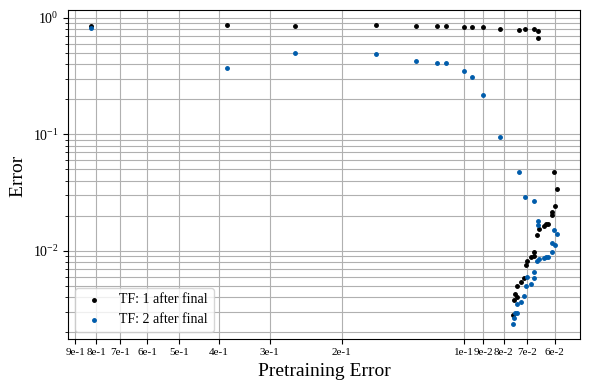

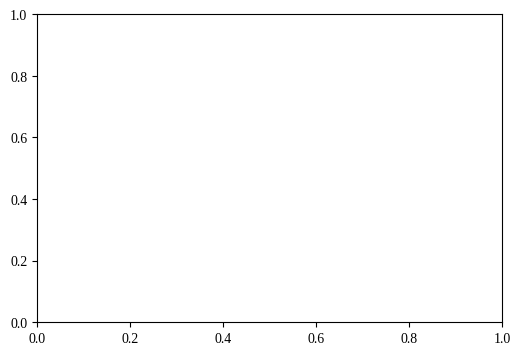

np.int64(37)

In [50]:
steps_in = [1,2]
plot_haystack_train_conv_pretrain_x_axis(config, colors, fin_quartiles_ckpt, beg_quartiles_ckpt, x_values, train_exs_cong, tf_avg_cong, matching_indices, haystack_len, experiment, steps_in, False, abs_err=False, fig=None, ax=None)

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(7, 4))

ax.invert_xaxis()


model_names = ["ortho_haar_tiny", "ortho_haar_small", "ortho_haar_medium_single_gpu", "ortho_haar_big"]


sizes = ["Tiny-4M", "Small-5.7M", "Medium-9.1M", "Big-20.7M"]
model_count = 0


haystack_len = 1

steps_in = [1, 2, 3, 7,8]

late_start = None
paren_swap = False
same_tokens = False
irrelevant_tokens = False
fix_needle = False
new_hay_insert = False
opposite_ortho = False
only_beg = False
fix_needle =False
datasource = "val"
acc = False

# markers = ["o", "x"]
# linestyles = ["-", "--"]
for model_name in model_names:
    tf_avg_cong, tf_std_cong, train_exs_cong, output_dir = gen_cong_lsts(config, model_name)

    model_dir, experiment = split_path(output_dir)


    config.override("datasource", datasource) # set the datasource in the config object
    config.override("acc", acc) # set the acc in the config object for using the ACCESS server

    # config.override("late_start", late_start) # set the late_start in the config object
    config.override("late_start", late_start)

    config.override("paren_swap", paren_swap) # set the paren_swap in the config object
    if config.paren_swap:
        print("Running paren swap experiment\n\n\n")

    config.override("same_tokens", same_tokens) # set the same_tokens in the config object
    if config.same_tokens:
        print("Running same tokens experiment\n\n\n")

    config.override("irrelevant_tokens", irrelevant_tokens) # set the irrelevant_tokens in the config object
    if config.irrelevant_tokens:
        print("Running irrelevant tokens experiment\n\n\n")

    config.override("fix_needle", fix_needle) # set the fix_needle in the config object
    if config.fix_needle:
        print("Running fix needle experiment\n\n\n")

    config.override("new_hay_insert", new_hay_insert) # set the new_hay_insert in the config object
    if config.new_hay_insert:
        print("Running new hay insertion experiment\n\n\n")

    config.override("opposite_ortho", opposite_ortho) # set the opposite_ortho in the config object
    if config.opposite_ortho:
        config.override("val_dataset_typ", "ortho")

    config.override("only_beg", only_beg) # set the only_beg in the config object
    if config.only_beg:
        print("only plotting the beginning evals\n\n\n")

    train_conv_fin_quartiles_file, train_conv_beg_quartiles_file, x_values_file, fin_quartiles_ckpt, beg_quartiles_ckpt, x_values = load_quartiles_ckpt_files(config, haystack_len, model_dir, experiment, False)


    train_exs_cong_arr = np.array(train_exs_cong[0])


    # Safer approach to find matching indices between arrays
    matching_indices = []
    train_exs_values = []

    # For each value in x_values, try to find a match in train_exs_cong
    x_ind = 0
    x_inds = []
    for x in x_values:
        # Find where values match (within some small tolerance for floating point)
        matches = np.where(np.isclose(train_exs_cong_arr, x, rtol=1e-10))[0]
        
        if len(matches) > 0:
            # If found, use the first match
            matching_indices.append(matches[0])
            train_exs_values.append(train_exs_cong_arr[matches[0]])
            x_inds.append(x_ind)
        else:
            print(f"No match found for x_value: {x}")

        x_ind += 1

    matching_indices = np.array(matching_indices)
    train_exs_values = np.array(train_exs_values)
    print(f"matching_indices: {matching_indices}")
    print(f"x_inds: {x_inds}")
    print(f"train_exs_values: {train_exs_values}")
    print(f"x_values: {x_values}")
    print(f"train_exs_cong_arr: {train_exs_cong_arr}")

    plot_haystack_train_conv_pretrain_x_axis(config, colors, fin_quartiles_ckpt, beg_quartiles_ckpt, x_values, train_exs_cong, tf_avg_cong, matching_indices, haystack_len, experiment, steps_in, False, abs_err=False, fig=fig, ax=ax, model_count=model_count, size=sizes[model_count])
    model_count += 1

In [ ]:
print(f"matching_indices: {matching_indices}")
print(f"train_exs_cong: {train_exs_cong[0]}")

## Pretraining loss plot

In [ ]:
fig,ax = plt.subplots(1, 1, figsize=(6, 4))


model_names = ["ortho_haar_tiny", "ortho_haar_small", "ortho_haar_medium_single_gpu", "ortho_haar_big"]

sizes = ["Tiny-4M", "Small-5.7M", "Medium-9.1M", "Big-20.7M"]
model_count = 0

markers = ["o", "x"]
linestyles = ["-", "--"]
for model_name in model_names:
    tf_avg_cong, tf_std_cong, train_exs_cong, output_dir = gen_cong_lsts(config, model_name)
    count = 0


    #capitalize the first letter of each datasource
    datasources = ["Test", "Train"]
    for tf_avg_lst, tf_std_lst, train_exs in zip(tf_avg_cong, tf_std_cong, train_exs_cong):
        print(f"count: {count}")
        tf_avg_arr = np.array(tf_avg_lst)
        tf_std_arr = np.array(tf_std_lst)
        train_exs_arr = np.array(train_exs)
        print(f"tf_avg_lst: {tf_avg_lst}")
        ax.plot(train_exs_arr, tf_avg_arr, color=colors[model_count], linewidth=2, label=f"{sizes[model_count]}: {datasources[count]}", marker=markers[count], linestyle=linestyles[count], markersize=5, zorder=2-count)
        ax.fill_between(train_exs_arr, tf_avg_arr - tf_std_arr, tf_avg_arr + tf_std_arr, color=colors[model_count], alpha=0.2, zorder=0)

        print(f"pseudo_pred_stats[datasources[count]][0]: {pseudo_pred_stats[datasources[count]][0]}")
        #plot the pseudo prediction error as a horizontal line
        count += 1

    if model_count == 2:
        train_exs_arr_for_pseudo = train_exs_arr

    model_count += 1


ax.plot(train_exs_arr_for_pseudo, pseudo_pred_stats["Test"][0]*np.ones_like(train_exs_arr_for_pseudo), color="black", linewidth=2, label=f"Pseudoinv Predictor", linestyle = ":", zorder=100)



ax.set_ylabel("Error")
ax.set_xlabel("# of Training Examples")
# ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="upper right", fontsize=8)
#set minor yticks every 0.01
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
#set gridlines
ax.grid(which='major', linestyle='--', linewidth=0.5)
ax.grid(which='minor', linestyle=':', linewidth=0.5)


fig.tight_layout()
time = datetime.now().strftime("%Y-%m-%d_%H")
fig_path = f"{output_dir}/figures/multi_cut/pretrain_loss/{model_name}_train_val_loss_cong_{time}.pdf"

os.makedirs(os.path.dirname(fig_path), exist_ok=True)
plt.savefig(fig_path, format='pdf')